# Nationalitäten #

Hypothese:
Die Verwendung von Nationalitäten führen zu Fehlern, weil diese als wertend interpretiert werden können.

Grund für Beschäftigung:
Quantitative Analyse

TODO: BSP

In [1]:
%run ../config.ipynb
%run ../lib/data_loader.ipynb
%run ../lib/helper_functions.ipynb
%run ../lib/diagramm_generator.ipynb
%run ../lib/metrics_generator.ipynb
%run ../lib/table_generator.ipynb

data = load_data('../data/predictions.json')

In [4]:
import csv
import requests
import datetime
import math

requestData = []
responseData = []
output = []
i = 0
stepsize = 100
maxLines = 670

countries = []
adjectives = []
nationalities = []

with open('../data/Nationalitäten.csv', encoding="utf8") as csvfile:
    reader = csv.DictReader(csvfile, delimiter=';')
    for row in reader:
        countries.append(row['country'])
        if row['adjektiv'] != '---':
            adjectives.append(row['adjektiv'])
        if row['nationalityM'] != '---':
            nationalities.append(row['nationalityM'])
        if row['nationalityF'] != '---':
            nationalities.append(row['nationalityF'])

In [5]:
# als Teilwort
def all(c):
    return True
def findFilter(contains):
    def f(element):
        return element['text'].lower().find(contains) > 0
    return f
def containsAdjective(element):
    for adjective in adjectives:
#         for token in element['tokens']:
#             if token.lower() == adjective.lower():
#                 return True
        if element['text'].lower().find(adjective) > 0:
            return True
    return False
def containsCountry(element):
    for country in countries:
        if element['text'].lower().find(country.lower()) > 0:
            return True
    return False
def containsNationality(element):
    for nationality in nationalities:
#         for token in element['tokens']:
#             if token.lower() == nationality.lower():
#                 return True
        if element['text'].lower().find(nationality.lower()) > 0:
            return True
    return False
def containsAdjectiveWithoutDeutsch(element):
    for adjective in adjectives:
        if element['text'].lower().find(adjective) > 0 and element['text'].lower().find('deutsch') == -1:
            return True
    return False

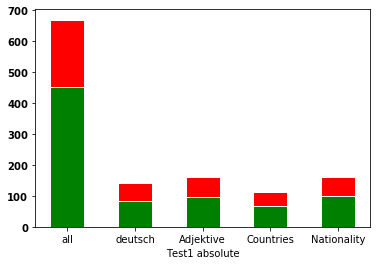

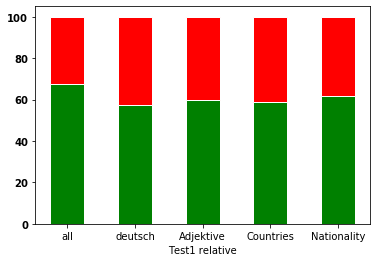

all


positiv labels (287),negative labels (383)


,true (452),false (218)
positiv (245),157,88
negativ (425),295,130


accuracy,precision,recall,f1Score
0.6746268656716418,0.6408163265306123,0.5470383275261324,0.5902255639097745


deutsch


positiv labels (77),negative labels (66)


,true (82),false (61)
positiv (60),38,22
negativ (83),44,39


accuracy,precision,recall,f1Score
0.5734265734265734,0.6333333333333333,0.4935064935064935,0.5547445255474452


deutsch change


positiv labels (270),negative labels (400)


,true (513),false (157)
positiv (245),179,66
negativ (425),334,91


accuracy,precision,recall,f1Score
0.7656716417910447,0.7306122448979592,0.662962962962963,0.6951456310679612


Adjektive


positiv labels (84),negative labels (77)


,true (96),false (65)
positiv (69),44,25
negativ (92),52,40


accuracy,precision,recall,f1Score
0.5962732919254659,0.6376811594202898,0.5238095238095238,0.5751633986928104


Adjektive change


positiv labels (272),negative labels (398)


,true (517),false (153)
positiv (245),182,63
negativ (425),335,90


accuracy,precision,recall,f1Score
0.7716417910447761,0.7428571428571429,0.6691176470588235,0.7040618955512573


In [6]:
uppercaseFilters = []
# uppercaseFilters.append(('all',generate_filter(0, 2000, uppercaseWords)))
# addFilterInterval(uppercaseFilters, 0, 10, 1, uppercaseWords)
uppercaseFilters.append(('all', all))
uppercaseFilters.append(('deutsch',findFilter('deutsch')))
uppercaseFilters.append(('Adjektive',containsAdjective))
uppercaseFilters.append(('Countries',containsCountry))
uppercaseFilters.append(('Nationality',containsNationality))

#name, filters, relative
# print('uppercase word count')
createPlt(name = "Test1 absolute", filters = uppercaseFilters, relative = False)
createPlt(name = "Test1 relative", filters = uppercaseFilters, relative = True)
# print('All')
# showMetrics(calcMetrics(generate_filter(0, 2000, uppercaseWords)))
# print('1-16')
print('all')
showMetrics(calcMetrics())
print('deutsch')
showMetrics(calcMetrics(uppercaseFilters[1][1]))
print('deutsch change')
showMetrics(calcMetricDifference(calcMetrics(uppercaseFilters[1][1])))
print('Adjektive')
showMetrics(calcMetrics(uppercaseFilters[2][1]))
print('Adjektive change')
showMetrics(calcMetricDifference(calcMetrics(uppercaseFilters[2][1])))